In [5]:
!pip install wandb


In [6]:
%mkdir ../data
!wget -O ../data/aclImdb_v1.tar.gz http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -zxf ../data/aclImdb_v1.tar.gz -C ../data

mkdir: cannot create directory ‘../data’: File exists
--2024-03-28 09:19:53--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘../data/aclImdb_v1.tar.gz’

../data/aclImdb_v1. 100%[===================>]  80.23M  7.25MB/s    in 16s     

2024-03-28 09:20:10 (4.86 MB/s) - ‘../data/aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [7]:
import os
import glob

def read_imdb_data(data_dir='../data/aclImdb'):
    data = {}
    labels = {}

    for data_type in ['train', 'test']:
        data[data_type] = {}
        labels[data_type] = {}

        for sentiment in ['pos', 'neg']:
            data[data_type][sentiment] = []
            labels[data_type][sentiment] = []

            path = os.path.join(data_dir, data_type, sentiment, '*.txt')
            files = glob.glob(path)

            for f in files:
                with open(f) as review:
                    data[data_type][sentiment].append(review.read())
                    # Here we represent a positive review by '1' and a negative review by '0'
                    labels[data_type][sentiment].append(1 if sentiment == 'pos' else 0)

            assert len(data[data_type][sentiment]) == len(labels[data_type][sentiment]), \
                    "{}/{} data size does not match labels size".format(data_type, sentiment)

    return data, labels

In [8]:
data, labels = read_imdb_data()
print("IMDB reviews: train = {} pos / {} neg, test = {} pos / {} neg".format(
            len(data['train']['pos']), len(data['train']['neg']),
            len(data['test']['pos']), len(data['test']['neg'])))


IMDB reviews: train = 12500 pos / 12500 neg, test = 12500 pos / 12500 neg


In [9]:
from sklearn.utils import shuffle

def prepare_imdb_data(data, labels):
    #Combine positive and negative reviews and labels
    data_train = data['train']['pos'] + data['train']['neg']
    data_test = data['test']['pos'] + data['test']['neg']
    labels_train = labels['train']['pos'] + labels['train']['neg']
    labels_test = labels['test']['pos'] + labels['test']['neg']

    #Shuffle reviews and corresponding labels within training and test sets
    data_train, labels_train = shuffle(data_train, labels_train)
    data_test, labels_test = shuffle(data_test, labels_test)

    # Return a unified training data, test data, training labels, test labels
    return data_train, data_test, labels_train, labels_test

In [10]:
train_X, test_X, train_y, test_y = prepare_imdb_data(data, labels)
print(len(train_X))
print(len(train_y))

25000
25000


The first step in processing the reviews is to make sure that any html tags that appear should be removed. In addition we wish to tokenize our input, that way words such as entertained and entertaining are considered the same with regard to sentiment analysis.

In [11]:
# Import the necessary cleaning Libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *
import re
from bs4 import BeautifulSoup


In [12]:

def review_to_words(review):
    nltk.download("stopwords", quiet=True)
    stemmer = PorterStemmer()
    text = BeautifulSoup(review, "html.parser").get_text() # Remove HTML tags
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower()) # Convert to lower case
    words = text.split() # Split string into words
    words = [w for w in words if w not in stopwords.words("english")] # Remove stopwords
    words = [PorterStemmer().stem(w) for w in words] # stem

    return words

In [13]:
print(train_X[100])
review_to_words(train_X[100])


I remember Devil Dog playing on TBS almost 20 years ago, and my older sister and her friends watching it and laughing all the next day. It's not that bad for a made-for-TV horror movie, but it is derivative (mostly of The Exorcist) and businesslike, for lack of a better word. It won't blow you away with artful cinematography or great acting, but it's not a waste of time, either. It's the kind of movie you watch to kill a couple of hours when you aren't in the mood to think too hard.<br /><br />However, if you go into the movie looking for some laughs, you won't be disappointed. The early scenes, with Lucky the Devil Dog as a cute little puppy with Children of the Damned eyes are hilariously non-threatening, and the climactic blue-screen effects of a giant black dog (with horns!) are pretty side-splitting. And keep an eye out for the cloaked Satanist in Maverick shades toward the beginning.<br /><br />Not a great horror film by any stretch of the imagination, but I wish they still made 

['rememb',
 'devil',
 'dog',
 'play',
 'tb',
 'almost',
 '20',
 'year',
 'ago',
 'older',
 'sister',
 'friend',
 'watch',
 'laugh',
 'next',
 'day',
 'bad',
 'made',
 'tv',
 'horror',
 'movi',
 'deriv',
 'mostli',
 'exorcist',
 'businesslik',
 'lack',
 'better',
 'word',
 'blow',
 'away',
 'art',
 'cinematographi',
 'great',
 'act',
 'wast',
 'time',
 'either',
 'kind',
 'movi',
 'watch',
 'kill',
 'coupl',
 'hour',
 'mood',
 'think',
 'hard',
 'howev',
 'go',
 'movi',
 'look',
 'laugh',
 'disappoint',
 'earli',
 'scene',
 'lucki',
 'devil',
 'dog',
 'cute',
 'littl',
 'puppi',
 'children',
 'damn',
 'eye',
 'hilari',
 'non',
 'threaten',
 'climact',
 'blue',
 'screen',
 'effect',
 'giant',
 'black',
 'dog',
 'horn',
 'pretti',
 'side',
 'split',
 'keep',
 'eye',
 'cloak',
 'satanist',
 'maverick',
 'shade',
 'toward',
 'begin',
 'great',
 'horror',
 'film',
 'stretch',
 'imagin',
 'wish',
 'still',
 'made',
 'stuff',
 'like',
 'tv']

In [14]:
def filter_reviews_by_word_count(reviews, labels, min_words, max_words):
    filtered_reviews = []
    filtered_labels = []
    for review, label in zip(reviews, labels):
        num_words = len(review)
        if min_words <= num_words <= max_words:
            filtered_reviews.append(review)
            filtered_labels.append(label)
    return filtered_reviews, filtered_labels

In [15]:
import os
import pickle

cache_dir = "../data"  # where to store cache files
os.makedirs(cache_dir, exist_ok=True)  # ensure cache directory exists

def preprocess_data(data_train, data_test, labels_train, labels_test,
                    cache_dir=cache_dir, cache_file="preprocessed_data.pkl"):
    """Convert each review to words; read from cache if available."""

    # If cache_file is not None, try to read from it first
    cache_data = None
    if cache_file is not None:
        try:
            with open(os.path.join(cache_dir, cache_file), "rb") as f:
                cache_data = pickle.load(f)
            print("Read preprocessed data from cache file:", cache_file)
        except:
            pass  # unable to read from cache, but that's okay

    # If cache is missing, then do the heavy lifting
    if cache_data is None:
        # Preprocess training and test data to obtain words for each review
        #words_train = list(map(review_to_words, data_train))
        #words_test = list(map(review_to_words, data_test))
        words_train = [review_to_words(review) for review in data_train]
        words_test = [review_to_words(review) for review in data_test]

        words_train, labels_train = filter_reviews_by_word_count(words_train, labels_train, min_words=100, max_words=500)
        words_test, labels_test = filter_reviews_by_word_count(words_test, labels_test, min_words=100, max_words=500)

        # Write to cache file for future runs
        if cache_file is not None:
            cache_data = dict(words_train=words_train, words_test=words_test,
                              labels_train=labels_train, labels_test=labels_test)
            with open(os.path.join(cache_dir, cache_file), "wb") as f:
                pickle.dump(cache_data, f)
            print("Wrote preprocessed data to cache file:", cache_file)
    else:
        # Unpack data loaded from cache file
        words_train, words_test, labels_train, labels_test = (cache_data['words_train'],
                cache_data['words_test'], cache_data['labels_train'], cache_data['labels_test'])

    return words_train, words_test, labels_train, labels_test


In [16]:
train_X, test_X, train_y, test_y = preprocess_data(train_X, test_X, train_y, test_y)


Read preprocessed data from cache file: preprocessed_data.pkl


In [17]:
# Determine the size of the validation set (20% of the training data)
val_size = int(0.2 * len(train_X))

# Split the data into training and validation sets
val_X = train_X[:val_size]
val_y = train_y[:val_size]

# Update the training data to exclude the validation set
train_X = train_X[val_size:]
train_y = train_y[val_size:]


In [18]:
print(len(train_X))

8596


Since we will be using a recurrent neural network, it will be convenient if the length of each review is the same. To do this, we will fix a size for our reviews and then pad short reviews with the category 'no word' (which we will label 0) and truncate long reviews. Basically in the dictionary the one with the most higher rank is the one that occurs most frequently. You dont care for the first two these are no words

In [19]:
import numpy as np

def build_dict(data, vocab_size = 5000):
    """Construct and return a dictionary mapping each of the most frequently appearing words to a unique integer."""
    word_count = {}

    for sentence in data:
        for word in sentence:
            if word in word_count:
                word_count[word] += 1
            else:
                word_count[word] = 1

    # DONE: Sort the words found in `data` so that sorted_words[0] is the most frequently appearing word and
    #       sorted_words[-1] is the least frequently appearing word.

    sorted_words = sorted(word_count, key=word_count.get, reverse=True)
    print("this is the first word having most frequency",sorted_words[0])
    print("this is the word having least frequency",sorted_words[-1])

    word_dict = {} # This is what we are building, a dictionary that translates words into integers
    for idx, word in enumerate(sorted_words[:vocab_size - 2]): # The -2 is so that we save room for the 'no word'
        word_dict[word] = idx + 2                              # 'infrequent' labels

    return word_dict

In [20]:
import os
import pickle

data_dir = '../data'  # The folder we will use for storing data
word_dict_file = os.path.join(data_dir, 'word_dict.pkl')

if os.path.exists(word_dict_file):
    # If the word dictionary file exists, load it
    with open(word_dict_file, "rb") as f:
        word_dict = pickle.load(f)
    print("Loaded word dictionary from:", word_dict_file)
else:
    # If the word dictionary file doesn't exist, build it
    word_dict = build_dict(train_X)
    with open(word_dict_file, "wb") as f:
        pickle.dump(word_dict, f)
    print("Built and saved word dictionary to:", word_dict_file)

print(list(word_dict.keys())[0:5])


this is the first word having most frequency film
this is the word having least frequency tablecloth
Built and saved word dictionary to: ../data/word_dict.pkl
['film', 'movi', 'one', 'like', 'make']


Now that we have our word dictionary which allows us to transform the words appearing in the reviews into integers, it is time to make use of it and convert our reviews to their integer sequence representation, making sure to pad or truncate to a fixed length, which in our case is 500.

In [21]:
def convert_and_pad(word_dict, sentence, pad=500):
    NOWORD = 0 # We will use 0 to represent the 'no word' category
    INFREQ = 1 # and we use 1 to represent the infrequent words, i.e., words not appearing in word_dict

    working_sentence = [NOWORD] * pad

    for word_index, word in enumerate(sentence[:pad]):
        if word in word_dict:
            working_sentence[word_index] = word_dict[word]
        else:
            working_sentence[word_index] = INFREQ

    return working_sentence, min(len(sentence), pad)

In [22]:
def convert_and_pad_data(word_dict, data, pad=500):
    result = []
    lengths = []

    for sentence in data:
        converted, leng = convert_and_pad(word_dict, sentence, pad)
        result.append(converted)
        lengths.append(leng)

    return np.array(result), np.array(lengths)

In [23]:
train_X, train_X_len = convert_and_pad_data(word_dict, train_X)
test_X, test_X_len = convert_and_pad_data(word_dict, test_X)
val_X,val_X_len=convert_and_pad_data(word_dict,val_X)


In [24]:
import os
import pandas as pd

data_dir = '../data'  # The folder we will use for storing data
train_csv_file = os.path.join(data_dir, 'train.csv')

if not os.path.exists(train_csv_file):
    # If the train.csv file doesn't exist, create it
    pd.concat([pd.DataFrame(train_y), pd.DataFrame(train_X_len), pd.DataFrame(train_X)], axis=1) \
        .to_csv(train_csv_file, header=False, index=False)
    print("Created train.csv file:", train_csv_file)
else:
    print("train.csv file already exists, skipping creation.")

Created train.csv file: ../data/train.csv


In [25]:
data_dir = '../data'  # The folder we will use for storing data
val_csv_file = os.path.join(data_dir, 'val.csv')

if not os.path.exists(val_csv_file):
    # If the train.csv file doesn't exist, create it
    pd.concat([pd.DataFrame(val_y), pd.DataFrame(val_X_len), pd.DataFrame(val_X)], axis=1) \
        .to_csv(val_csv_file, header=False, index=False)
    print("Created val.csv file:", val_csv_file)
else:
    print("val.csv file already exists, skipping creation.")

Created val.csv file: ../data/val.csv


In [26]:
pd.concat([pd.DataFrame(test_y), pd.DataFrame(test_X_len), pd.DataFrame(test_X)], axis=1) \
        .to_csv(os.path.join(data_dir, 'test.csv'), header=False, index=False)

In [27]:
print(train_X[0])
print(train_X_len[0])

[  23   17 2058 3920  827    1  461  195  518  126    5 1553 1829  259
   12  146  466 2439  135  354   22   42  100   41 1554   67   83  877
  920 3129  677  160  343  139  920 1809  620 1180  106 1582 3522 1106
  350  312 1282  166  840  148  416  266  677 2013 1694   20  311    7
  273  195  220 1349  484 1029  137 1269   63  894 4994  458  575   89
 2058 3920  846  780  285   49   63   33  304  330 1461  135    9 3964
 4414 2180  587 1109  477    2   47   20  957  344  706   44   71 2308
  137 2815    1   28  162  160  832  466  485   68  596   20  113  729
  501    8    2 1127  143  126  776   85  458 1355 3920   41  174  142
   20  113 1293  503  964  235   65  401 4994  816 3130  982 1033  891
  620  982  113    1    2  549 1129    1 1810  137  287 3131 3132  461
  146 1025 1002   31  677 2323 2560 3522  218  227    1  989  135  419
  232  305 1428    1   19    1   89 1269   43 1783    1 2888  163  771
  800  472  216 1796  588   77  135 2423   31 1642    1  350    1  315
 2163 

In [28]:
import torch.nn as nn

class RNNClassifier(nn.Module):
    """ RNNClassifier class for initializing the layers for the simple
    recurrent neural network model (RNN) used for Sentiment Analysis of
    IMDB reviews.

    Attributes:
        embedding_dim (int): Dimensionality of the embedding layer
        hidden_dim (int): Dimensionality of the hidden layer(s)
        vocab_size (int): Size of the vocabulary used by Bag of Words

    """

    def __init__(self, embedding_dim, hidden_dim, vocab_size):
        super(RNNClassifier, self).__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)
        self.dense = nn.Linear(hidden_dim, 1)
        self.sig = nn.Sigmoid()

    def forward(self, x):
        lengths = x[:, 0]  # Extract lengths from the input
        reviews = x[:, 1:]  # Extract reviews from the input
        embeds = self.embedding(reviews)
        rnn_out, _ = self.rnn(embeds)
        output = self.dense(torch.mean(rnn_out, dim=1))
        return self.sig(output.squeeze())


In [29]:
import torch.nn as nn

class LSTMClassifier(nn.Module):
    """ LSTMClassifier class for initializing the layers for the simple
    recurrent neural network model (RNN) used for Sentiment Analysis of
    IMDB reviews.

    Attributes:
        embedding_dim (int) dimensionality of the embedding layer
        hidden_dim (int) dimensionality of the hidden layer(s)
        vocab_size (int) size of the vocabulary used by Bag of Words

    """

    def __init__(self, embedding_dim, hidden_dim, vocab_size):

        super(LSTMClassifier, self).__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim)
        self.dense = nn.Linear(in_features=hidden_dim, out_features=1)
        self.sig = nn.Sigmoid()

        self.word_dict = None


    def forward(self, x):
        x = x.t()
        lengths = x[0,:]
        reviews = x[1:,:]
        embeds = self.embedding(reviews)
        lstm_out, _ = self.lstm(embeds)
        out = self.dense(lstm_out)
        out = out[lengths - 1, range(len(lengths))]
        return self.sig(out.squeeze())

In [30]:
def evaluate(model, dataloader, loss_fn, device):
    """
    Function to evaluate the model on a given dataset.

    Args:
    - model: the PyTorch model to evaluate
    - dataloader: DataLoader object for the dataset
    - loss_fn: loss function used for training
    - device: device to run the evaluation on (e.g., "cpu" or "cuda")

    Returns:
    - accuracy: accuracy of the model on the dataset
    - loss: average loss on the dataset
    """

    model.eval()  # Set the model to evaluation mode

    correct = 0
    total = 0
    running_loss = 0.0

    with torch.no_grad():  # Disable gradient calculation during evaluation
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)

            # Compute loss
            loss = loss_fn(outputs, labels)
            running_loss += loss.item()

            # Compute accuracy
            predicted = torch.round(outputs)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    avg_loss = running_loss / len(dataloader)

    return accuracy, avg_loss


In [31]:
def train(model, train_loader, val_loader, epochs, optimizer, loss_fn, device):
    for epoch in range(1, epochs + 1):
        model.train()
        total_loss = 0
        for batch in train_loader:
            batch_X, batch_y = batch

            batch_X = batch_X.to(device)
            batch_y = batch_y.to(device)

            optimizer.zero_grad()
            output = model(batch_X)
            loss = loss_fn(output, batch_y)
            loss.backward()
            optimizer.step()

            total_loss += loss.data.item()

        # Validation phase
        val_accuracy, val_loss = evaluate(model, val_loader, loss_fn, device)

        # Calculate average training loss
        avg_train_loss = total_loss / len(train_loader)

        # Print and log the losses
        print("Epoch: {}, Train Loss: {:.4f}, Val Loss: {:.4f}, Val Accuracy: {:.4f}".format(epoch, avg_train_loss, val_loss, val_accuracy))
        wandb.log({"train_loss": avg_train_loss, "val_loss": val_loss})


In [32]:
import torch
import torch.utils.data
# Read in only the first 250 rows
train_sample = pd.read_csv(os.path.join(data_dir, 'train.csv'), header=None, names=None)

# Turn the input pandas dataframe into tensors
train_sample_y = torch.from_numpy(train_sample[[0]].values).float().squeeze()
train_sample_X = torch.from_numpy(train_sample.drop([0], axis=1).values).long()

# Build the dataset
train_sample_ds = torch.utils.data.TensorDataset(train_sample_X, train_sample_y)

# Read in only the first 250 rows
val_sample = pd.read_csv(os.path.join(data_dir, 'val.csv'), header=None, names=None)

# Turn the input pandas dataframe into tensors
val_sample_y = torch.from_numpy(val_sample[[0]].values).float().squeeze()
val_sample_X = torch.from_numpy(val_sample.drop([0], axis=1).values).long()

# Build the dataset
val_sample_ds = torch.utils.data.TensorDataset(val_sample_X, val_sample_y)

test_sample = pd.read_csv(os.path.join(data_dir, 'test.csv'), header=None, names=None)

# Turn the input pandas dataframe into tensors
test_sample_y = torch.from_numpy(test_sample[[0]].values).float().squeeze()
test_sample_X = torch.from_numpy(test_sample.drop([0], axis=1).values).long()

# Build the dataset
test_sample_ds = torch.utils.data.TensorDataset(test_sample_X, test_sample_y)

In [33]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [34]:
import torch
import wandb
wandb.login(key="ac8ef4bdae5edab6284aaf71af5502f523fcb79f")

# Define hyperparameter configurations
hyperparameters = [
    {"embedding_dim": 32, "hidden_dim": 64, "batch_size": 64},
    {"embedding_dim": 64, "hidden_dim": 128, "batch_size": 128},
    {"embedding_dim": 128, "hidden_dim": 256, "batch_size": 128},
    {"embedding_dim": 256, "hidden_dim": 512, "batch_size": 512},
    {"embedding_dim": 512, "hidden_dim": 1024, "batch_size": 512},
]

# Experiment loop
accuracies = []
for i, config in enumerate(hyperparameters, 1):
    config_name = f"run_{i}"
    wandb.init(project="hyperparameter-tuning_LSTM", name=config_name)  # Initialize Wandb for each run

    # Load your data loaders (train_sample_dl, test_sample_dl, val_sample_dl)
    train_sample_dl = torch.utils.data.DataLoader(train_sample_ds, batch_size=config["batch_size"])
    test_sample_dl = torch.utils.data.DataLoader(test_sample_ds,  batch_size=config["batch_size"])
    val_sample_dl = torch.utils.data.DataLoader(val_sample_ds,  batch_size=config["batch_size"])

    # Create model with specified hyperparameters
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = LSTMClassifier(config["embedding_dim"], config["hidden_dim"], vocab_size=5000).to(device)

    # Define optimizer and loss function
    optimizer = torch.optim.Adam(model.parameters())
    loss_fn = torch.nn.BCELoss()

    # Train the model
    train(model, train_sample_dl, val_sample_dl, 15, optimizer, loss_fn, device)

    # Evaluate the model on validation set
    accuracy, avg_loss = evaluate(model, test_sample_dl, loss_fn, device)

    # Log metrics using Wandb for the current run
    print(f"LSTM Run {i}: Accuracy on validation set: {accuracy:.4f}, Average loss on validation set: {avg_loss:.4f}")
    wandb.log({"run": i, "accuracy": accuracy, "avg_loss": avg_loss})

    # Finish current Wandb run
    accuracies.append(accuracy)
    wandb.finish()

print("Average Accuracy shown by LSTM IS:", np.mean(accuracies))

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: prishadcmc (prisha). Use `wandb login --relogin` to force relogin


Epoch: 1, Train Loss: 0.6824, Val Loss: 0.6578, Val Accuracy: 0.6040
Epoch: 2, Train Loss: 0.6149, Val Loss: 0.6013, Val Accuracy: 0.6640
Epoch: 3, Train Loss: 0.5279, Val Loss: 0.5458, Val Accuracy: 0.7138
Epoch: 4, Train Loss: 0.4525, Val Loss: 0.4852, Val Accuracy: 0.7636
Epoch: 5, Train Loss: 0.3933, Val Loss: 0.4766, Val Accuracy: 0.7650
Epoch: 6, Train Loss: 0.3530, Val Loss: 0.4608, Val Accuracy: 0.7804
Epoch: 7, Train Loss: 0.3255, Val Loss: 0.4448, Val Accuracy: 0.7939
Epoch: 8, Train Loss: 0.3212, Val Loss: 0.4329, Val Accuracy: 0.8032
Epoch: 9, Train Loss: 0.2917, Val Loss: 0.4291, Val Accuracy: 0.8125
Epoch: 10, Train Loss: 0.2611, Val Loss: 0.4275, Val Accuracy: 0.8190
Epoch: 11, Train Loss: 0.2315, Val Loss: 0.4849, Val Accuracy: 0.8083
Epoch: 12, Train Loss: 0.1992, Val Loss: 0.4417, Val Accuracy: 0.8302
Epoch: 13, Train Loss: 0.1669, Val Loss: 0.4839, Val Accuracy: 0.8255
Epoch: 14, Train Loss: 0.1516, Val Loss: 0.5507, Val Accuracy: 0.8208
Epoch: 15, Train Loss: 0.1404

accuracy,▁
avg_loss,▁
run,▁
train_loss,█▇▆▅▄▄▃▃▃▃▂▂▁▁▁
val_loss,█▆▅▃▂▂▂▁▁▁▃▁▃▅▃
accuracy,0.8061
avg_loss,0.55769
run,1
train_loss,0.14037
val_loss,0.50453


Epoch: 1, Train Loss: 0.6730, Val Loss: 0.6459, Val Accuracy: 0.6059
Epoch: 2, Train Loss: 0.5929, Val Loss: 0.5774, Val Accuracy: 0.6840
Epoch: 3, Train Loss: 0.5126, Val Loss: 0.5101, Val Accuracy: 0.7441
Epoch: 4, Train Loss: 0.4825, Val Loss: 0.5395, Val Accuracy: 0.7115
Epoch: 5, Train Loss: 0.4231, Val Loss: 0.4771, Val Accuracy: 0.7645
Epoch: 6, Train Loss: 0.3557, Val Loss: 0.4606, Val Accuracy: 0.7943
Epoch: 7, Train Loss: 0.3210, Val Loss: 0.4410, Val Accuracy: 0.8018
Epoch: 8, Train Loss: 0.2975, Val Loss: 0.4326, Val Accuracy: 0.8097
Epoch: 9, Train Loss: 0.2445, Val Loss: 0.4385, Val Accuracy: 0.8120
Epoch: 10, Train Loss: 0.2133, Val Loss: 0.4419, Val Accuracy: 0.8302
Epoch: 11, Train Loss: 0.2293, Val Loss: 0.4550, Val Accuracy: 0.8069
Epoch: 12, Train Loss: 0.2143, Val Loss: 0.4608, Val Accuracy: 0.8320
Epoch: 13, Train Loss: 0.1741, Val Loss: 0.5424, Val Accuracy: 0.7855
Epoch: 14, Train Loss: 0.1469, Val Loss: 0.5048, Val Accuracy: 0.8185
Epoch: 15, Train Loss: 0.1059

accuracy,▁
avg_loss,▁
run,▁
train_loss,█▇▆▆▅▄▄▃▃▂▃▂▂▂▁
val_loss,█▆▄▅▂▂▁▁▁▁▂▂▅▃▅
accuracy,0.81335
avg_loss,0.57429
run,2
train_loss,0.10591
val_loss,0.54532


Epoch: 1, Train Loss: 0.6492, Val Loss: 0.6014, Val Accuracy: 0.6645
Epoch: 2, Train Loss: 0.5500, Val Loss: 0.5085, Val Accuracy: 0.7422
Epoch: 3, Train Loss: 0.4587, Val Loss: 0.5569, Val Accuracy: 0.7031
Epoch: 4, Train Loss: 0.4424, Val Loss: 0.4617, Val Accuracy: 0.7850
Epoch: 5, Train Loss: 0.3522, Val Loss: 0.4536, Val Accuracy: 0.7929
Epoch: 6, Train Loss: 0.3847, Val Loss: 0.5142, Val Accuracy: 0.7417
Epoch: 7, Train Loss: 0.3154, Val Loss: 0.4840, Val Accuracy: 0.7734
Epoch: 8, Train Loss: 0.2495, Val Loss: 0.4854, Val Accuracy: 0.8064
Epoch: 9, Train Loss: 0.1926, Val Loss: 0.4984, Val Accuracy: 0.7962
Epoch: 10, Train Loss: 0.1550, Val Loss: 0.5741, Val Accuracy: 0.8129
Epoch: 11, Train Loss: 0.1465, Val Loss: 0.6000, Val Accuracy: 0.8134
Epoch: 12, Train Loss: 0.1001, Val Loss: 0.6383, Val Accuracy: 0.8101
Epoch: 13, Train Loss: 0.0555, Val Loss: 0.6772, Val Accuracy: 0.8036
Epoch: 14, Train Loss: 0.0716, Val Loss: 0.7222, Val Accuracy: 0.7966
Epoch: 15, Train Loss: 0.0661

accuracy,▁
avg_loss,▁
run,▁
train_loss,█▇▆▆▄▅▄▃▃▂▂▂▁▁▁
val_loss,▅▂▄▁▁▃▂▂▂▄▅▆▇█▇
accuracy,0.78103
avg_loss,0.72946
run,3
train_loss,0.06607
val_loss,0.6943


Epoch: 1, Train Loss: 0.6386, Val Loss: 0.5740, Val Accuracy: 0.6854
Epoch: 2, Train Loss: 0.5626, Val Loss: 0.5991, Val Accuracy: 0.6487
Epoch: 3, Train Loss: 0.5471, Val Loss: 0.5420, Val Accuracy: 0.7013
Epoch: 4, Train Loss: 0.4839, Val Loss: 0.5006, Val Accuracy: 0.7450
Epoch: 5, Train Loss: 0.4059, Val Loss: 0.5087, Val Accuracy: 0.7590
Epoch: 6, Train Loss: 0.3508, Val Loss: 0.4510, Val Accuracy: 0.7887
Epoch: 7, Train Loss: 0.3488, Val Loss: 0.5118, Val Accuracy: 0.7417
Epoch: 8, Train Loss: 0.2851, Val Loss: 0.4806, Val Accuracy: 0.7734
Epoch: 9, Train Loss: 0.2418, Val Loss: 0.4833, Val Accuracy: 0.7725
Epoch: 10, Train Loss: 0.1998, Val Loss: 0.4958, Val Accuracy: 0.7687
Epoch: 11, Train Loss: 0.1528, Val Loss: 0.5373, Val Accuracy: 0.7734
Epoch: 12, Train Loss: 0.1910, Val Loss: 0.6658, Val Accuracy: 0.6803
Epoch: 13, Train Loss: 0.2378, Val Loss: 0.5670, Val Accuracy: 0.7766
Epoch: 14, Train Loss: 0.1083, Val Loss: 0.5358, Val Accuracy: 0.7762
Epoch: 15, Train Loss: 0.0599

accuracy,▁
avg_loss,▁
run,▁
train_loss,█▇▇▆▅▅▄▄▃▃▂▃▃▂▁
val_loss,▅▆▄▃▃▁▃▂▂▂▄█▅▄▅
accuracy,0.76549
avg_loss,0.66287
run,4
train_loss,0.0599
val_loss,0.58751


Epoch: 1, Train Loss: 0.7130, Val Loss: 0.6281, Val Accuracy: 0.6128
Epoch: 2, Train Loss: 0.5949, Val Loss: 0.5899, Val Accuracy: 0.6682
Epoch: 3, Train Loss: 0.4996, Val Loss: 0.5505, Val Accuracy: 0.6989
Epoch: 4, Train Loss: 0.4319, Val Loss: 0.5971, Val Accuracy: 0.7310
Epoch: 5, Train Loss: 0.4373, Val Loss: 0.5214, Val Accuracy: 0.7422
Epoch: 6, Train Loss: 0.3506, Val Loss: 0.4983, Val Accuracy: 0.7738
Epoch: 7, Train Loss: 0.3028, Val Loss: 0.4616, Val Accuracy: 0.7939
Epoch: 8, Train Loss: 0.2559, Val Loss: 0.5396, Val Accuracy: 0.7552
Epoch: 9, Train Loss: 0.1803, Val Loss: 0.5070, Val Accuracy: 0.7911
Epoch: 10, Train Loss: 0.1106, Val Loss: 0.5984, Val Accuracy: 0.7673
Epoch: 11, Train Loss: 0.0820, Val Loss: 0.6884, Val Accuracy: 0.7617
Epoch: 12, Train Loss: 0.0695, Val Loss: 0.7267, Val Accuracy: 0.7520
Epoch: 13, Train Loss: 0.0670, Val Loss: 0.8042, Val Accuracy: 0.7659
Epoch: 14, Train Loss: 0.0531, Val Loss: 0.8067, Val Accuracy: 0.7976
Epoch: 15, Train Loss: 0.0393

accuracy,▁
avg_loss,▁
run,▁
train_loss,█▇▆▅▅▄▄▃▂▂▁▁▁▁▁
val_loss,▄▃▃▃▂▂▁▂▂▃▅▆▇▇█
accuracy,0.73966
avg_loss,0.8871
run,5
train_loss,0.03933
val_loss,0.8574


Average Accuracy shown by LSTM IS: 0.7811248808388942


In [37]:
# Initialize Wandb for the RNN experiment
wandb.init(project="hyperparameter-tuning_RNN_Final", name="RNN_Experiment_Final")

# Define hyperparameters for the RNN
config_rnn = {"embedding_dim": 64, "hidden_dim": 128, "batch_size": 32}

# Create the RNN model with specified hyperparameters
model_rnn = RNNClassifier(config_rnn["embedding_dim"], config_rnn["hidden_dim"], vocab_size=5000).to(device)

# Define optimizer and loss function for RNN
optimizer_rnn = torch.optim.Adam(model_rnn.parameters())
loss_fn_rnn = torch.nn.BCELoss()

# DataLoader for RNN
train_sample_dl_rnn = torch.utils.data.DataLoader(train_sample_ds, batch_size=config_rnn["batch_size"])
test_sample_dl_rnn = torch.utils.data.DataLoader(test_sample_ds, batch_size=config_rnn["batch_size"])
val_sample_dl_rnn = torch.utils.data.DataLoader(val_sample_ds, batch_size=config_rnn["batch_size"])

# Train the RNN model
train(model_rnn, train_sample_dl_rnn, val_sample_dl_rnn, 15, optimizer_rnn, loss_fn_rnn, device)

# Evaluate the RNN model on the test set
accuracy_rnn, avg_loss_rnn = evaluate(model_rnn, test_sample_dl_rnn, loss_fn_rnn, device)

# Log metrics using Wandb
print(f"RNN: Accuracy on test set: {accuracy_rnn:.4f}, Average loss on test set: {avg_loss_rnn:.4f}")
wandb.log({"accuracy_rnn": accuracy_rnn, "avg_loss_rnn": avg_loss_rnn})

# Finish Wandb run for RNN
wandb.finish()


train_loss,██████████████████▇▇▇▆▆▅▄▄▄▃▂▁
val_loss,█████████████████▇▇▆▇▆▅▄▄▄▃▃▂▁
train_loss,0.39669
val_loss,0.42762


Epoch: 1, Train Loss: 0.6508, Val Loss: 0.5909, Val Accuracy: 0.7338
Epoch: 2, Train Loss: 0.4812, Val Loss: 0.5207, Val Accuracy: 0.8185
Epoch: 3, Train Loss: 0.4010, Val Loss: 0.4103, Val Accuracy: 0.8339
Epoch: 4, Train Loss: 0.3125, Val Loss: 0.3737, Val Accuracy: 0.8469
Epoch: 5, Train Loss: 0.2536, Val Loss: 0.3812, Val Accuracy: 0.8436
Epoch: 6, Train Loss: 0.2809, Val Loss: 0.4259, Val Accuracy: 0.8520
Epoch: 7, Train Loss: 0.2948, Val Loss: 0.3595, Val Accuracy: 0.8520
Epoch: 8, Train Loss: 0.2171, Val Loss: 0.3769, Val Accuracy: 0.8460
Epoch: 9, Train Loss: 0.1778, Val Loss: 0.4044, Val Accuracy: 0.8483
Epoch: 10, Train Loss: 0.1503, Val Loss: 0.4431, Val Accuracy: 0.8492
Epoch: 11, Train Loss: 0.1614, Val Loss: 0.4264, Val Accuracy: 0.8520
Epoch: 12, Train Loss: 0.1614, Val Loss: 0.3884, Val Accuracy: 0.8506
Epoch: 13, Train Loss: 0.1250, Val Loss: 0.4542, Val Accuracy: 0.8534
Epoch: 14, Train Loss: 0.1111, Val Loss: 0.5255, Val Accuracy: 0.8450
Epoch: 15, Train Loss: 0.0883

accuracy_rnn,▁
avg_loss_rnn,▁
train_loss,█▆▅▄▃▃▄▃▂▂▂▂▁▁▁
val_loss,█▆▃▁▂▃▁▂▂▄▃▂▄▆▇
accuracy_rnn,0.82536
avg_loss_rnn,0.65724
train_loss,0.08833
val_loss,0.56105


In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F
wandb.init(project="hyperparameter-tuning_rnn_2_final", name="RNN_Experiment_2_final")

class RNNLastOutput(nn.Module):
    """ RNNLastOutput class for initializing the layers for the RNN model
    that only picks the last output of the RNN layer.

    Attributes:
        embedding_dim (int): Dimensionality of the embedding layer
        hidden_dim (int): Dimensionality of the hidden layer(s)
        vocab_size (int): Size of the vocabulary used by Bag of Words

    """

    def __init__(self, embedding_dim, hidden_dim, vocab_size):
        super(RNNLastOutput, self).__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)
        self.dense = nn.Linear(hidden_dim, 1)
        self.sig = nn.Sigmoid()

    def forward(self, x):
        lengths = x[:, 0]  # Extract lengths from the input
        reviews = x[:, 1:]  # Extract reviews from the input
        embeds = self.embedding(reviews)
        rnn_out, _ = self.rnn(embeds)
        last_output = rnn_out[:, -1, :]  # Select the last time step's output
        output = self.dense(last_output)
        return self.sig(output.squeeze())

class RNNMeanOutput(nn.Module):
    """ RNNMeanOutput class for initializing the layers for the RNN model
    that takes the mean of all outputs in the RNN layer.

    Attributes:
        embedding_dim (int): Dimensionality of the embedding layer
        hidden_dim (int): Dimensionality of the hidden layer(s)
        vocab_size (int): Size of the vocabulary used by Bag of Words

    """

    def __init__(self, embedding_dim, hidden_dim, vocab_size):
        super(RNNMeanOutput, self).__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)
        self.dense = nn.Linear(hidden_dim, 1)
        self.sig = nn.Sigmoid()

    def forward(self, x):
        lengths = x[:, 0]  # Extract lengths from the input
        reviews = x[:, 1:]  # Extract reviews from the input
        embeds = self.embedding(reviews)
        rnn_out, _ = self.rnn(embeds)
        mean_output = torch.mean(rnn_out, dim=1)
        output = self.dense(mean_output)
        return self.sig(output.squeeze())

# Initialize the RNN models
model_last_output = RNNLastOutput(embedding_dim=32, hidden_dim=100, vocab_size=5000).to(device)
model_mean_output = RNNMeanOutput(embedding_dim=32, hidden_dim=100, vocab_size=5000).to(device)

# Define optimizer and loss function
optimizer = optimizer = torch.optim.Adam(model_last_output.parameters())
loss_fn = torch.nn.BCELoss()

# Train and evaluate the RNN model with last output
train(model_last_output, train_sample_dl, val_sample_dl, 15, optimizer, loss_fn, device)
accuracy_last_output, avg_loss_last_output = evaluate(model_last_output, test_sample_dl, loss_fn, device)
print("RNN with last output: Accuracy =", accuracy_last_output, ", Avg Loss =", avg_loss_last_output)
optimizer = torch.optim.Adam(model_mean_output.parameters())

# Train and evaluate the RNN model with mean output
train(model_mean_output, train_sample_dl, val_sample_dl, 15, optimizer, loss_fn, device)
accuracy_mean_output, avg_loss_mean_output = evaluate(model_mean_output, test_sample_dl, loss_fn, device)
print("RNN with mean output: Accuracy =", accuracy_mean_output, ", Avg Loss =", avg_loss_mean_output)


Epoch: 1, Train Loss: 0.6939, Val Loss: 0.6926, Val Accuracy: 0.5072
Epoch: 2, Train Loss: 0.6933, Val Loss: 0.6928, Val Accuracy: 0.5067
Epoch: 3, Train Loss: 0.6929, Val Loss: 0.6928, Val Accuracy: 0.5058
Epoch: 4, Train Loss: 0.6925, Val Loss: 0.6929, Val Accuracy: 0.5058
Epoch: 5, Train Loss: 0.6924, Val Loss: 0.6931, Val Accuracy: 0.5067
Epoch: 6, Train Loss: 0.6920, Val Loss: 0.6931, Val Accuracy: 0.5067
Epoch: 7, Train Loss: 0.6925, Val Loss: 0.6932, Val Accuracy: 0.5077
Epoch: 8, Train Loss: 0.6921, Val Loss: 0.6933, Val Accuracy: 0.5040
Epoch: 9, Train Loss: 0.6922, Val Loss: 0.6934, Val Accuracy: 0.5063
Epoch: 10, Train Loss: 0.6918, Val Loss: 0.6932, Val Accuracy: 0.5072
Epoch: 11, Train Loss: 0.6915, Val Loss: 0.6934, Val Accuracy: 0.5049
Epoch: 12, Train Loss: 0.6918, Val Loss: 0.6935, Val Accuracy: 0.5072
Epoch: 13, Train Loss: 0.6916, Val Loss: 0.6944, Val Accuracy: 0.5021
Epoch: 14, Train Loss: 0.6921, Val Loss: 0.6933, Val Accuracy: 0.5063
Epoch: 15, Train Loss: 0.6916

LSTM Outperforms RNN
LSTM (Long Short-Term Memory) performed better than the basic RNN (Recurrent Neural Network) architecture due to its ability to mitigate the vanishing gradient problem and better capture long-range dependencies in sequential data. In sentiment analysis of movie reviews, where understanding the context and sentiment over longer sequences is crucial.

When experimenting with different methods of handling RNN outputs, it was observed that taking the mean of all outputs in the RNN layer yielded better results compared to considering only the last output. This improvement in accuracy, reaching approximately 70%, can be explained by the fact that averaging the outputs helps in aggregating information from all time steps, providing a more comprehensive representation of the input sequence and reducing the impact of noisy or irrelevant information

Incorporating Stemming/Lemmatization
Incorporating stemming or lemmatization during text preprocessing resulted in a more compact and normalized vocabulary, reducing the number of unique words and normalizing variations of the same word. This process aids in generalization by treating different forms of a word as identical, thus improving the model's ability to recognize patterns and sentiments across various word forms and enhancing overall performance

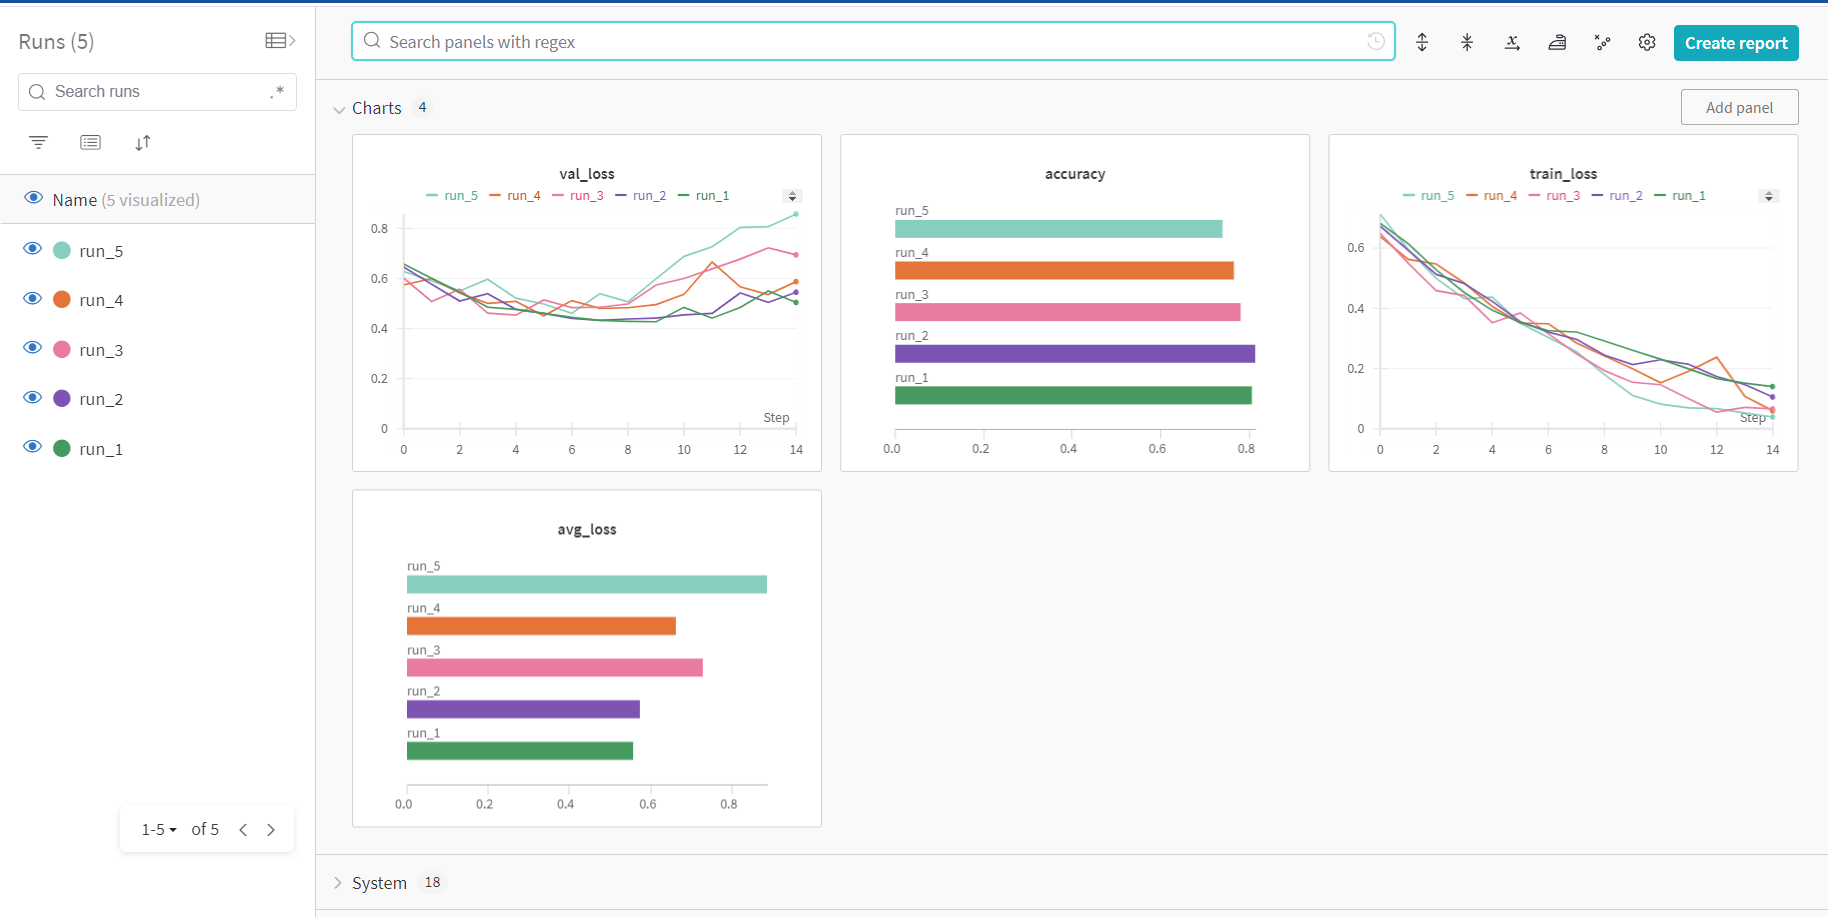